In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ari_train_df = pd.read_csv("ari_train.csv")
ari_test_df = pd.read_csv("ari_test.csv")

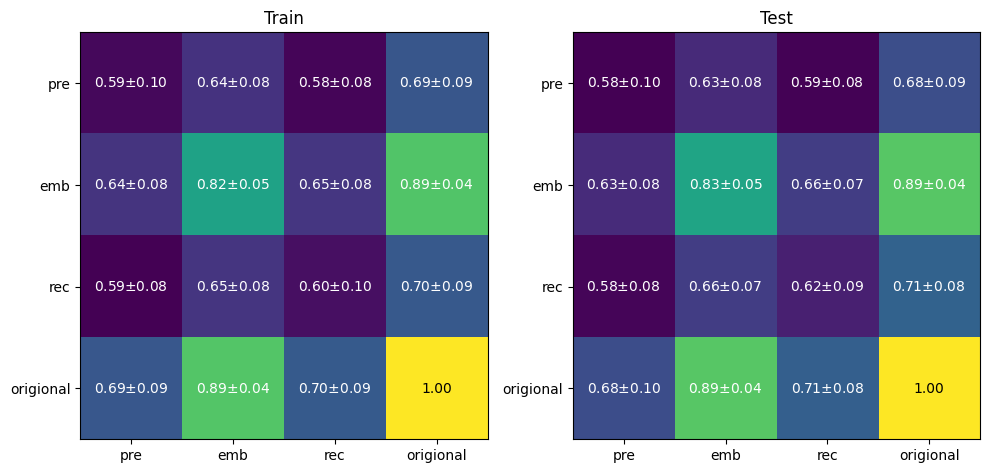

In [10]:
def plot_ari(ari_df, ax, title):
    ari_scores = np.array([
        ari_df[stage]
        for stage in ari_df["stage"]
    ])

    ari_std = np.array([
        ari_df[stage + "_std"]
        for stage in ari_df["stage"]
    ])
    
    ax.imshow(ari_scores)
    ax.set_title(title)

    for i, a_stage in enumerate(ari_df["stage"]):
        for j, b_stage in enumerate(ari_df["stage"]):
            value = ari_scores[i,j]
            std = ari_std[i,j]

            text = f"{value:.2f}"

            if std > 0.001:
                text += f"$\pm${std:.2f}"


            color = 'w' if value < 0.9 else "black"
            ax.text(i, j, text,ha='center', va="center", color=color)

    ax.set_yticks([0,1,2,3], ari_df["stage"])
    ax.set_xticks([0,1,2,3], ari_df["stage"])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

plot_ari(ari_train_df, ax1, "Train")
plot_ari(ari_test_df, ax2, "Test")

fig.tight_layout()
fig.savefig("Ari.png")
